In [13]:
# Import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [14]:
#import path
path = r'C:\Users\kanch\OneDrive\Desktop\Career Foundry\Achievement 4. Python 8.8.2023\Moved_Files\02 Data\Prepared Data'

In [15]:
# Importing 'ords_prods_all_updated.pkl'
df_ords_prods_all_updated = pd.read_pickle(os.path.join(path,'ords_prods_all_updated.pkl'))

In [16]:
#import path
path = r'C:\Users\kanch\OneDrive\Desktop\Career Foundry\Achievement 4. Python 8.8.2023\Moved_Files\02 Data\Prepared Data'

In [17]:
# Importing 'orders_products_merged_update.pkl'

df_orders_products_merged = pd.read_pickle(os.path.join(path,'orders_products_merged_updated.pkl'))

# 02. Consider any security implications that might exist for this new data

To address the security implications of personally identifiable information (PII) in the database, the columns 'first_name' and 'last_name' should be dropped from the database. These columns contain information that can directly identify an individual, and their removal can help to protect the confidentiality and privacy of this information.

In [18]:
#Displaying the first five rows of the Dataframe
df_ords_prods_all_updated.head()

,user_id,first,last,gender,state,age,date_joined,number_of_dependants,marital_status,income
0,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665
1,33890,Patricia,Hart,Female,New Mexico,36,1/1/2017,0,single,59285
2,65803,Kenneth,Farley,Male,Idaho,35,1/1/2017,2,married,99568
3,125935,Michelle,Hicks,Female,Iowa,40,1/1/2017,0,single,42049
4,130797,Ann,Gilmore,Female,Maryland,26,1/1/2017,1,married,40374


In [19]:
# dropping first and last name due to PII
df_ords_prods_all_updated = df_ords_prods_all_updated.drop(columns = ['first', 'last'])

In [20]:
#checking
df_ords_prods_all_updated.head()

,user_id,gender,state,age,date_joined,number_of_dependants,marital_status,income
0,26711,Female,Missouri,48,1/1/2017,3,married,165665
1,33890,Female,New Mexico,36,1/1/2017,0,single,59285
2,65803,Male,Idaho,35,1/1/2017,2,married,99568
3,125935,Female,Iowa,40,1/1/2017,0,single,42049
4,130797,Female,Maryland,26,1/1/2017,1,married,40374


In [21]:
#Dispaly all the columns in the dataframe
pd.options.display.max_columns = None

In [22]:
#double checking no other columns need to be addressed due to PII
df_ords_prods_all_updated.head()

,user_id,gender,state,age,date_joined,number_of_dependants,marital_status,income
0,26711,Female,Missouri,48,1/1/2017,3,married,165665
1,33890,Female,New Mexico,36,1/1/2017,0,single,59285
2,65803,Male,Idaho,35,1/1/2017,2,married,99568
3,125935,Female,Iowa,40,1/1/2017,0,single,42049
4,130797,Female,Maryland,26,1/1/2017,1,married,40374


# 03. Create a regional segmentation of the data by creating a “Region” column based on the “State”

In [23]:
#Creating regions per wikipedia
Northeast = ['Maine', 'New Hampshire', 'Vermont', 'Massachusetts', 'Rhode Island', 'Connecticut', 'New York', 'Pennsylvania', 'New Jersey']
Midwest = ['Wisconsin', 'Michigan','Illinois', 'Indiana', 'Ohio', 'North Dakota', 'South Dakota', 'Nebraska', 'Kansas', 'Minnesota', 'Iowa', 'Missouri']
South = ['Delaware', 'Maryland', 'District of Columbia', 'Virginia', 'West Virginia', 'North Carolina', 'South Carolina', 'Georgia', 'Florida', 'Kentucky', 'Tennessee', 'Mississippi', 'Alabama', 'Oklahoma', 'Texas', 'Arkansas', 'Louisiana']
West = ['Idaho', 'Montana', 'Wyoming', 'Nevada', 'Utah', 'Colorado', 'Arizona', 'New Mexico', 'Alaska', 'Washington', 'Oregon', 'California', 'Hawaii']

In [24]:
# creating new region column
df_ords_prods_all_updated.loc[df_ords_prods_all_updated['state'].isin(Northeast), 'Region'] = 'Northeast'
df_ords_prods_all_updated.loc[df_ords_prods_all_updated['state'].isin(South), 'Region'] = 'South'
df_ords_prods_all_updated.loc[df_ords_prods_all_updated['state'].isin(West), 'Region'] = 'West'
df_ords_prods_all_updated.loc[df_ords_prods_all_updated['state'].isin(Midwest), 'Region'] = 'Midwest'

In [25]:
# Check flag counts
df_ords_prods_all_updated['Region'].value_counts()

South        64981
West         49655
Midwest      45868
Northeast    34446
Name: Region, dtype: int64

In [26]:
# checking new region column
df_ords_prods_all_updated['Region'].head()

0    Midwest
1       West
2       West
3    Midwest
4      South
Name: Region, dtype: object

In [27]:
#double checking to make sure they add up
df_ords_prods_all_updated.shape

(194950, 9)

In [28]:
df_ords_prods_all_updated['Region'].value_counts(dropna = False)

South        64981
West         49655
Midwest      45868
Northeast    34446
Name: Region, dtype: int64

# 3.1 Determine whether there’s a difference in spending habits between the different U.S. regions. (Hint: You can do this by crossing the variable you just created with the spending flag.)

In [29]:
print(df_ords_prods_all_updated.columns)


Index(['user_id', 'gender', 'state', 'age', 'date_joined',
       'number_of_dependants', 'marital_status', 'income', 'Region'],
      dtype='object')


In [30]:
# Creating “average_price” column using transform()

df_orders_products_merged['average_price'] = df_orders_products_merged.groupby(['user_id'])['prices'].transform(np.mean)

In [31]:
df_orders_products_merged.head()

,Unnamed: 0,order_id,user_id,eval_set,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,_merge,product_name,aisle_id,department_id,prices,busiest_day,busiest_days,busiest_period_of_day,average_price
0,0,2539329,1,prior,1,2,8,0.0,196,1,0,both,Soda,77,7,9.0,Regularly busy,Regularly busy,Average orders,6.367797
1,1,2398795,1,prior,2,3,7,15.0,196,1,1,both,Soda,77,7,9.0,Regularly busy,Least busy days,Average orders,6.367797
2,2,473747,1,prior,3,3,12,21.0,196,1,1,both,Soda,77,7,9.0,Regularly busy,Least busy days,Most orders,6.367797
3,3,2254736,1,prior,4,4,7,29.0,196,1,1,both,Soda,77,7,9.0,Least busy,Least busy days,Average orders,6.367797
4,4,431534,1,prior,5,4,15,28.0,196,1,1,both,Soda,77,7,9.0,Least busy,Least busy days,Most orders,6.367797


In [32]:
# Rounding averages 

df_orders_products_merged['average_price'] = df_orders_products_merged['average_price'].round(2)

In [33]:
df_orders_products_merged.head()

,Unnamed: 0,order_id,user_id,eval_set,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,_merge,product_name,aisle_id,department_id,prices,busiest_day,busiest_days,busiest_period_of_day,average_price
0,0,2539329,1,prior,1,2,8,0.0,196,1,0,both,Soda,77,7,9.0,Regularly busy,Regularly busy,Average orders,6.37
1,1,2398795,1,prior,2,3,7,15.0,196,1,1,both,Soda,77,7,9.0,Regularly busy,Least busy days,Average orders,6.37
2,2,473747,1,prior,3,3,12,21.0,196,1,1,both,Soda,77,7,9.0,Regularly busy,Least busy days,Most orders,6.37
3,3,2254736,1,prior,4,4,7,29.0,196,1,1,both,Soda,77,7,9.0,Least busy,Least busy days,Average orders,6.37
4,4,431534,1,prior,5,4,15,28.0,196,1,1,both,Soda,77,7,9.0,Least busy,Least busy days,Most orders,6.37


In [34]:
# Creating a 'spending_flag' flag

df_orders_products_merged.loc[df_orders_products_merged['average_price'] < 10, 'spending_flag'] = 'Low spender'

In [35]:
# Creating a 'spending_flag' flag

df_orders_products_merged.loc[df_orders_products_merged['average_price'] >= 10, 'spending_flag'] = 'High spender'

In [36]:
df_orders_products_merged.head()

,Unnamed: 0,order_id,user_id,eval_set,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,_merge,product_name,aisle_id,department_id,prices,busiest_day,busiest_days,busiest_period_of_day,average_price,spending_flag
0,0,2539329,1,prior,1,2,8,0.0,196,1,0,both,Soda,77,7,9.0,Regularly busy,Regularly busy,Average orders,6.37,Low spender
1,1,2398795,1,prior,2,3,7,15.0,196,1,1,both,Soda,77,7,9.0,Regularly busy,Least busy days,Average orders,6.37,Low spender
2,2,473747,1,prior,3,3,12,21.0,196,1,1,both,Soda,77,7,9.0,Regularly busy,Least busy days,Most orders,6.37,Low spender
3,3,2254736,1,prior,4,4,7,29.0,196,1,1,both,Soda,77,7,9.0,Least busy,Least busy days,Average orders,6.37,Low spender
4,4,431534,1,prior,5,4,15,28.0,196,1,1,both,Soda,77,7,9.0,Least busy,Least busy days,Most orders,6.37,Low spender


In [37]:
# Check the frequency

df_orders_products_merged['spending_flag'].value_counts(dropna = False)

Low spender     31798102
High spender      636110
Name: spending_flag, dtype: int64

In [38]:
# create crosstab to compare
spending_habits_frequency= pd.crosstab(df_ords_prods_all_updated['Region'], df_orders_products_merged['spending_flag'], dropna = False)

In [39]:
spending_habits_frequency

spending_flag,High spender,Low spender
Region,,
Midwest,674,45194
Northeast,537,33909
South,953,64028
West,754,48901


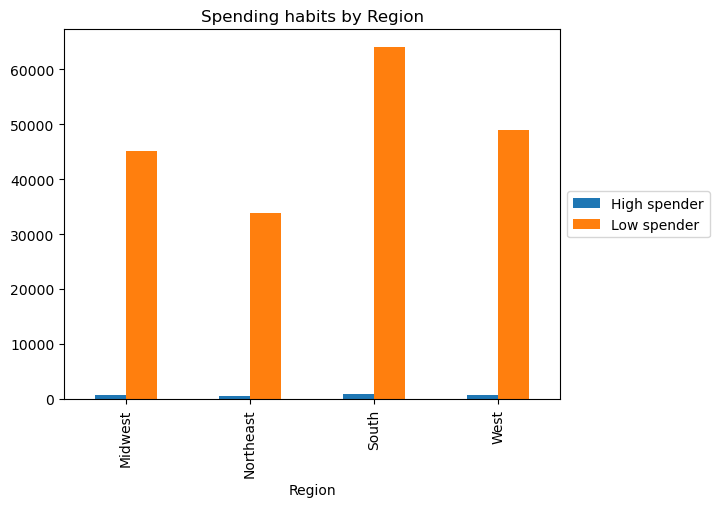

In [40]:
spending_habits_frequency_viz = spending_habits_frequency.plot.bar()
plt.title('Spending habits by Region')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

# The ratio of high-spenders vs low-spenders seems to be Inconsistent across all regions

In [41]:
#Export path
path = r'C:\Users\kanch\Documents\10-08-2023 Instacart Basket Analysis\04 Analysis\Visualizations'

In [42]:
# Export

spending_habits_frequency_viz.figure.savefig(os.path.join(path,'Spending Habits by Region.png'),bbox_inches='tight')

# 4. The Instacart CFO isn’t interested in customers who don’t generate much revenue for the app. Create an exclusion flag for low-activity customers (customers with less than 5 orders) and exclude them from the data. Make sure you export this sample.

In [43]:
# Create “max_order” column - this was deleted previously due to memory issues

df_ords_prods_all_updated['max_order'] = df_orders_products_merged.groupby(['user_id'])['order_number'].transform(np.max)

In [44]:
# Step 1 - Create a column for customer activity

df_ords_prods_all_updated.loc[df_ords_prods_all_updated['max_order']>=5,'customer_activity']='High_activity_customer'

In [45]:
df_ords_prods_all_updated.loc[df_ords_prods_all_updated['max_order']<5,'customer_activity']='Low_activity_customer'

In [46]:
# Check frequency
df_ords_prods_all_updated['customer_activity'].value_counts(dropna = False)

High_activity_customer    187855
Low_activity_customer       7095
Name: customer_activity, dtype: int64

In [47]:
# Step 2 - Create a subset for Low-activity customers and exclude them by exporting the new subset

df_low_act_customs = df_ords_prods_all_updated.loc[df_ords_prods_all_updated['customer_activity'] == 'Low_activity_customer']

In [49]:
# Export
path = r'C:\Users\kanch\OneDrive\Desktop\Career Foundry\Achievement 4. Python 8.8.2023\Moved_Files\02 Data\Prepared Data'

df_low_act_customs.to_pickle(os.path.join(path,'Low_activity_Customers.pkl'))

In [50]:
# Step 3 - Exclude Low_activity_customer from the data

df_ords_prods_all_updated = df_ords_prods_all_updated.loc[df_ords_prods_all_updated ['customer_activity'] == 'High_activity_customer']

In [51]:
 #Check frequency

df_ords_prods_all_updated['customer_activity'].value_counts(dropna = False)

High_activity_customer    187855
Name: customer_activity, dtype: int64

# 5.1 The marketing and business strategy units at Instacart want to create more-relevant marketing strategies for different products and are, thus, curious about customer profiling in their database. Create a profiling variable based on age, income, certain goods in the “department_id” column, and number of dependents.

# Variables

# a. Age

In [52]:
# Creating a flag for age groups

df_ords_prods_all_updated.loc[df_ords_prods_all_updated['age'] >= 40 & (df_ords_prods_all_updated['age'] < 60), 'age_group'] = 'middle_aged_adult'

In [53]:
df_ords_prods_all_updated.loc[df_ords_prods_all_updated['age'] < 40,'age_group'] = 'young_adult'

In [54]:
df_ords_prods_all_updated.loc[df_ords_prods_all_updated['age'] >= 60,'age_group']='old_adult'

In [55]:
# Check outcome
df_ords_prods_all_updated['age_group'].value_counts()

young_adult          64424
old_adult            64392
middle_aged_adult    59039
Name: age_group, dtype: int64

# b.Income

Text(0.5, 0, 'Income')

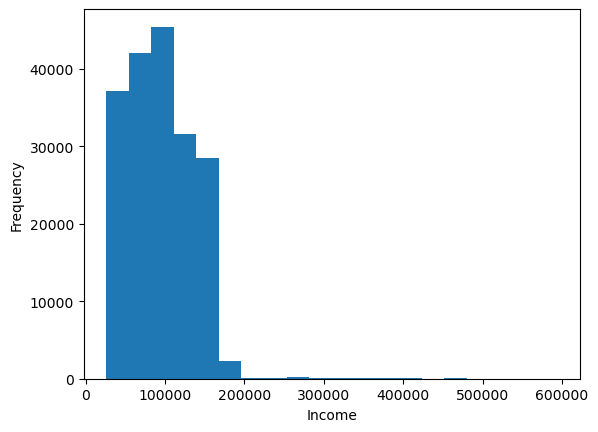

In [56]:
# Create a histogram to check the distribution

income_viz = df_ords_prods_all_updated['income'].plot.hist(bins = 20)
plt.xlabel("Income")

 In a histogram, the x-axis typically represents the variable you are measuring or studying. In this case, you have income levels on the x-axis. The y-axis represents the frequency or count of individuals or households falling into each income range.The key characteristic of a right-skewed histogram is that it has a longer tail on the right side (higher values) compared to the left side (lower values). A right-skewed income histogram suggests that the majority of people or households have incomes in the lower to middle-income range, while there are fewer individuals or households with very high incomes. 

In [57]:
# Export
path = r'C:\Users\kanch\Documents\10-08-2023 Instacart Basket Analysis\04 Analysis\Visualizations'

income_viz.figure.savefig(os.path.join(path,'income.png'),bbox_inches='tight')

In [58]:
# Check income stats

df_ords_prods_all_updated['income'].describe()

count    187855.000000
mean      94675.689244
std       42527.330173
min       25903.000000
25%       59914.000000
50%       93566.000000
75%      124297.500000
max      593901.000000
Name: income, dtype: float64

In [59]:
# Create an income flag for the three categories

df_ords_prods_all_updated.loc[(df_ords_prods_all_updated['income'] >= 48500 ) & (df_ords_prods_all_updated['income'] < 145500), 'income_group'] = 'middle_income'

In [60]:
df_ords_prods_all_updated.loc[(df_ords_prods_all_updated['income'] >= 145500), 'income_group'] = 'high_income'

In [61]:
df_ords_prods_all_updated.loc[(df_ords_prods_all_updated['income'] < 48500), 'income_group'] = 'low_income'

In [62]:
# Check outcome

df_ords_prods_all_updated['income_group'].value_counts()

middle_income    132923
low_income        29255
high_income       25677
Name: income_group, dtype: int64

# c. Department

In [63]:
# Import department data for crossreferencing
path = r'C:\Users\kanch\OneDrive\Desktop\Career Foundry\Achievement 4. Python 8.8.2023\Moved_Files\02 Data\Prepared Data'

df_dept = pd.read_csv(os.path.join(path,'departments_wrangled.csv'),index_col = False)

In [64]:
df_dept

,Unnamed: 0,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol
5,6,international
6,7,beverages
7,8,pets
8,9,dry goods pasta
9,10,bulk


In [65]:
# Rename the "Unnamed: 0" column

df_dept.rename(columns={'Unnamed: 0':'department_id'},inplace=True)

In [66]:
# Check outcome

df_dept

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol
5,6,international
6,7,beverages
7,8,pets
8,9,dry goods pasta
9,10,bulk


In [67]:
# Check data type department_id

df_dept.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   department_id  21 non-null     int64 
 1   department     21 non-null     object
dtypes: int64(1), object(1)
memory usage: 468.0+ bytes


In [68]:
# Change data type

df_dept['department_id']=df_dept['department_id'].astype('int8')

In [69]:
print(df_ords_prods_all_updated.columns)


Index(['user_id', 'gender', 'state', 'age', 'date_joined',
       'number_of_dependants', 'marital_status', 'income', 'Region',
       'max_order', 'customer_activity', 'age_group', 'income_group'],
      dtype='object')


In [70]:

# Check outcome
df_dept.head()

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


In [71]:
df_ords_prods_all_updated.head()

,user_id,gender,state,age,date_joined,number_of_dependants,marital_status,income,Region,max_order,customer_activity,age_group,income_group
0,26711,Female,Missouri,48,1/1/2017,3,married,165665,Midwest,10,High_activity_customer,middle_aged_adult,high_income
1,33890,Female,New Mexico,36,1/1/2017,0,single,59285,West,10,High_activity_customer,young_adult,middle_income
2,65803,Male,Idaho,35,1/1/2017,2,married,99568,West,10,High_activity_customer,young_adult,middle_income
3,125935,Female,Iowa,40,1/1/2017,0,single,42049,Midwest,10,High_activity_customer,middle_aged_adult,low_income
4,130797,Female,Maryland,26,1/1/2017,1,married,40374,South,10,High_activity_customer,young_adult,low_income


In [72]:
department_id_column = df_dept["department_id"]

In [73]:
df_ords_prods_all_updated= df_ords_prods_all_updated.join(department_id_column)

In [74]:
df_ords_prods_all_updated.head()

,user_id,gender,state,age,date_joined,number_of_dependants,marital_status,income,Region,max_order,customer_activity,age_group,income_group,department_id
0,26711,Female,Missouri,48,1/1/2017,3,married,165665,Midwest,10,High_activity_customer,middle_aged_adult,high_income,1.0
1,33890,Female,New Mexico,36,1/1/2017,0,single,59285,West,10,High_activity_customer,young_adult,middle_income,2.0
2,65803,Male,Idaho,35,1/1/2017,2,married,99568,West,10,High_activity_customer,young_adult,middle_income,3.0
3,125935,Female,Iowa,40,1/1/2017,0,single,42049,Midwest,10,High_activity_customer,middle_aged_adult,low_income,4.0
4,130797,Female,Maryland,26,1/1/2017,1,married,40374,South,10,High_activity_customer,young_adult,low_income,5.0


In [75]:
df_ords_prods_all_updated=df_ords_prods_all_updated.merge(df_dept,on='department_id')

In [76]:
df_ords_prods_all_updated.head()

,user_id,gender,state,age,date_joined,number_of_dependants,marital_status,income,Region,max_order,customer_activity,age_group,income_group,department_id,department
0,26711,Female,Missouri,48,1/1/2017,3,married,165665,Midwest,10,High_activity_customer,middle_aged_adult,high_income,1.0,frozen
1,33890,Female,New Mexico,36,1/1/2017,0,single,59285,West,10,High_activity_customer,young_adult,middle_income,2.0,other
2,65803,Male,Idaho,35,1/1/2017,2,married,99568,West,10,High_activity_customer,young_adult,middle_income,3.0,bakery
3,125935,Female,Iowa,40,1/1/2017,0,single,42049,Midwest,10,High_activity_customer,middle_aged_adult,low_income,4.0,produce
4,130797,Female,Maryland,26,1/1/2017,1,married,40374,South,10,High_activity_customer,young_adult,low_income,5.0,alcohol


In [77]:
df_ords_prods_all_updated['department'].value_counts()

frozen             1
meat seafood       1
deli               1
snacks             1
babies             1
household          1
dairy eggs         1
canned goods       1
breakfast          1
pantry             1
personal care      1
other              1
bulk               1
dry goods pasta    1
pets               1
beverages          1
international      1
alcohol            1
produce            1
bakery             1
missing            1
Name: department, dtype: int64

In [79]:
# Export
path = r'C:\Users\kanch\Documents\10-08-2023 Instacart Basket Analysis\04 Analysis\Visualizations'
department_id_bar_chart.figure.savefig(os.path.join(path,'department_bar_chart.png'),bbox_inches='tight')

# Dependents

In [80]:
df_ords_prods_all_updated.head()

,user_id,gender,state,age,date_joined,number_of_dependants,marital_status,income,Region,max_order,customer_activity,age_group,income_group,department_id,department
0,26711,Female,Missouri,48,1/1/2017,3,married,165665,Midwest,10,High_activity_customer,middle_aged_adult,high_income,1.0,frozen
1,33890,Female,New Mexico,36,1/1/2017,0,single,59285,West,10,High_activity_customer,young_adult,middle_income,2.0,other
2,65803,Male,Idaho,35,1/1/2017,2,married,99568,West,10,High_activity_customer,young_adult,middle_income,3.0,bakery
3,125935,Female,Iowa,40,1/1/2017,0,single,42049,Midwest,10,High_activity_customer,middle_aged_adult,low_income,4.0,produce
4,130797,Female,Maryland,26,1/1/2017,1,married,40374,South,10,High_activity_customer,young_adult,low_income,5.0,alcohol


In [81]:
# Check the different categories in the Family Status column

df_ords_prods_all_updated['marital_status'].value_counts()

married                             15
single                               4
living with parents and siblings     1
divorced/widowed                     1
Name: marital_status, dtype: int64

In [82]:
# Creating a Family Status flag for each customer 

df_ords_prods_all_updated.loc[(df_ords_prods_all_updated['marital_status'].isin(['divorced/widowed', 'living with parents and siblings', 'single'])) & (df_ords_prods_all_updated['number_of_dependants']==0), 'family_status_flag'] = 'Single with NO Dependants'

In [83]:
df_ords_prods_all_updated.loc[(df_ords_prods_all_updated['marital_status'].isin(['divorced/widowed', 'living with parents and siblings', 'single'])) & (df_ords_prods_all_updated['number_of_dependants'] >=1), 'family_status_flag'] = 'Single WITH Dependants'

In [84]:
df_ords_prods_all_updated.loc[(df_ords_prods_all_updated['marital_status'] == 'married') & (df_ords_prods_all_updated['number_of_dependants'] == 1), 'family_status_flag'] = 'Married with NO Dependants'

In [85]:
df_ords_prods_all_updated.loc[(df_ords_prods_all_updated['marital_status'] == 'married') & (df_ords_prods_all_updated['number_of_dependants'] > 1), 'family_status_flag'] = 'Married WITH Dependants'

In [86]:
# Check outcome

df_ords_prods_all_updated['family_status_flag'].value_counts()

Married WITH Dependants       8
Married with NO Dependants    7
Single with NO Dependants     5
Single WITH Dependants        1
Name: family_status_flag, dtype: int64

In [87]:
 #Aggregate the max, mean, and min variables on a customer-profile level for usage frequency and expenditure.

crosstab_departments = df_orders_products_merged.groupby('department_id').agg({'order_id':['count'],'days_since_prior_order':['mean'],  'prices':['mean']})
[47]
crosstab_departments

,order_id,days_since_prior_order,prices
,count,mean,mean
department_id,,,
1,2236432,10.900560,7.741434
2,36291,10.238792,6.990934
3,1176787,10.383543,7.864723
4,9479291,10.186943,7.981708
5,153743,9.486461,8.144407
6,269253,10.496154,7.682264
7,2688159,10.364692,7.680574
8,97724,11.063741,7.889636


In [88]:
crosstab_departments.to_clipboard()

# Meat Sea food variable

In [89]:
# Create a flag to profile Meat Seafood buyers vs non-buyers

df_ords_prods_all_updated.loc[df_ords_prods_all_updated['department_id'] == 12, 'customer'] = 'meat_buyer'

In [90]:
df_ords_prods_all_updated.loc[df_ords_prods_all_updated['department_id'] != 12, 'customer'] = 'meat_non_buyer'

In [91]:
# Use user_id to identify meat buyers

updated_meat_columns = df_ords_prods_all_updated.loc[df_ords_prods_all_updated['customer'] == 'meat_buyer', 'user_id'].unique()

In [92]:
# Update the "customer" column

df_ords_prods_all_updated.loc[df_ords_prods_all_updated['user_id'].isin(updated_meat_columns), 'customer'] = 'meat_buyer'

In [93]:
# Check distribution

df_ords_prods_all_updated['customer'].value_counts()

meat_non_buyer    20
meat_buyer         1
Name: customer, dtype: int64

# Snacks Variable

In [94]:
# Create a flag to profile Snack buyers vs non-buyers

df_ords_prods_all_updated.loc[df_ords_prods_all_updated['department_id'] == 19, 'customer_snacks'] = 'snack_buyer'

In [95]:
df_ords_prods_all_updated.loc[df_ords_prods_all_updated['department_id'] != 19, 'customer_snacks'] = 'snack_non_buyer'

In [96]:
# Use user_id to identify snack buyers

updated_snack_columns = df_ords_prods_all_updated.loc[df_ords_prods_all_updated['customer_snacks'] == 'snack_buyer', 'user_id'].unique()

In [97]:
# Update the "customer" column

df_ords_prods_all_updated.loc[df_ords_prods_all_updated['user_id'].isin(updated_snack_columns), 'customer_snacks'] = 'snack_buyer'

In [98]:
# Check distribution

df_ords_prods_all_updated['customer_snacks'].value_counts()

snack_non_buyer    20
snack_buyer         1
Name: customer_snacks, dtype: int64

In [99]:
df_orders_products_merged.head()

,Unnamed: 0,order_id,user_id,eval_set,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,_merge,product_name,aisle_id,department_id,prices,busiest_day,busiest_days,busiest_period_of_day,average_price,spending_flag
0,0,2539329,1,prior,1,2,8,0.0,196,1,0,both,Soda,77,7,9.0,Regularly busy,Regularly busy,Average orders,6.37,Low spender
1,1,2398795,1,prior,2,3,7,15.0,196,1,1,both,Soda,77,7,9.0,Regularly busy,Least busy days,Average orders,6.37,Low spender
2,2,473747,1,prior,3,3,12,21.0,196,1,1,both,Soda,77,7,9.0,Regularly busy,Least busy days,Most orders,6.37,Low spender
3,3,2254736,1,prior,4,4,7,29.0,196,1,1,both,Soda,77,7,9.0,Least busy,Least busy days,Average orders,6.37,Low spender
4,4,431534,1,prior,5,4,15,28.0,196,1,1,both,Soda,77,7,9.0,Least busy,Least busy days,Most orders,6.37,Low spender


# 5.2 You might also use the “orders_day_of_the_week” and “order_hour_of_day” columns if you can think of a way they would impact customer profiles. (Hint: As an example, try thinking of what characteristics would lead you to the profile “Single adult” or “Young parent.”)

# Variables

# a. Age

In [100]:
# Check Age Group with orders_day_of_week

age_group_order_days_week = pd.crosstab(df_orders_products_merged['orders_day_of_week'],df_ords_prods_all_updated['age_group'],dropna=False)

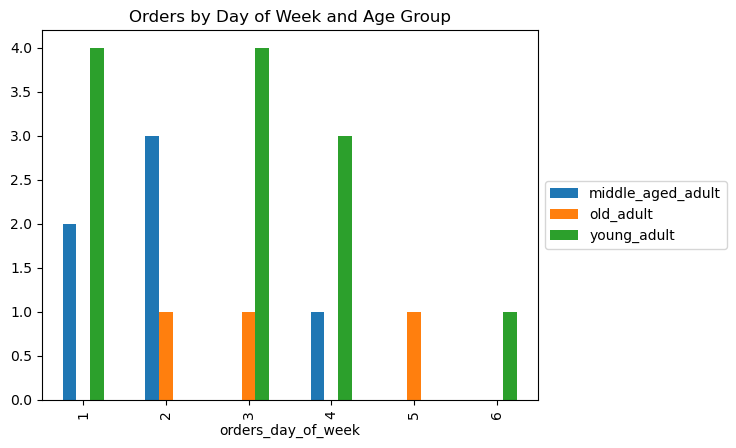

In [101]:
# Create a bar chart between Age Group with orders_day_of_week

age_group_order_days_week_viz = age_group_order_days_week.plot.bar()
plt.title('Orders by Day of Week and Age Group')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

In [102]:
#Export
path = r'C:\Users\kanch\Documents\10-08-2023 Instacart Basket Analysis\04 Analysis\Visualizations'
age_group_order_days_week_viz.figure.savefig(os.path.join(path, 'age_group_order_days_week_viz.png'),bbox_inches='tight')

In [103]:
# Check Age Group with orders_hour_of_day

age_group_order_hour_day = pd.crosstab(df_orders_products_merged['order_hour_of_day'],df_ords_prods_all_updated['age'],dropna=False)

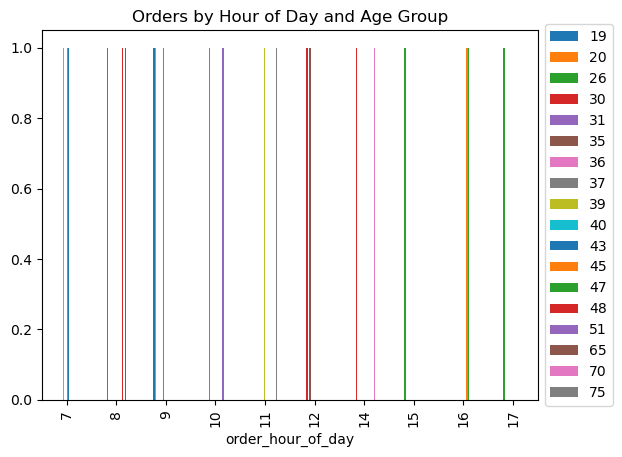

In [104]:
# Create a bar chart between Age Group with orders_day_of_week

age_group_order_hour_day_viz = age_group_order_hour_day.plot.bar()
plt.title('Orders by Hour of Day and Age Group')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

In [105]:
# Export
path = r'C:\Users\kanch\Documents\10-08-2023 Instacart Basket Analysis\04 Analysis\Visualizations'

age_group_order_hour_day_viz.figure.savefig(os.path.join(path,'age_group_order_hour_day_viz.png'),bbox_inches='tight')

# b.Income

In [106]:
# Check Income Group with orders_day_of_week

income_group_order_days_week = pd.crosstab(df_orders_products_merged['orders_day_of_week'],df_ords_prods_all_updated['income'],dropna=False)

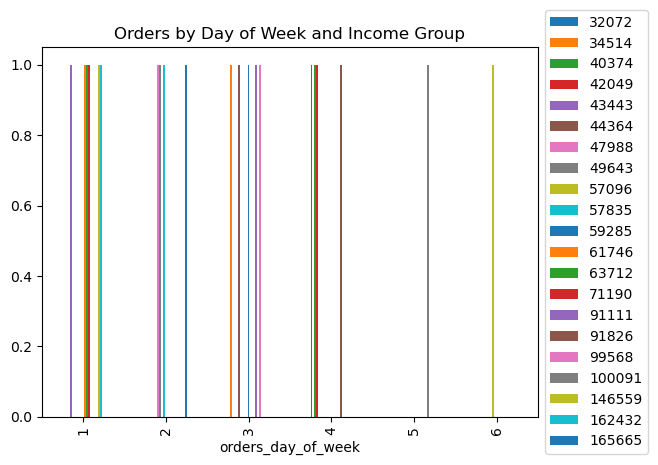

In [107]:
# Create a bar chart between Income Group with orders_day_of_week

income_group_order_days_week_viz = income_group_order_days_week.plot.bar()
plt.title('Orders by Day of Week and Income Group')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

In [108]:
# Export
path = r'C:\Users\kanch\Documents\10-08-2023 Instacart Basket Analysis\04 Analysis\Visualizations'
# Export

income_group_order_days_week_viz.figure.savefig(os.path.join(path, 'income_group_order_days_week_viz.png'),bbox_inches='tight')

In [109]:
# Check Income Group with orders_hour_of_day

income_group_order_hour_day = pd.crosstab(df_orders_products_merged['order_hour_of_day'],df_ords_prods_all_updated['income'],dropna=False)

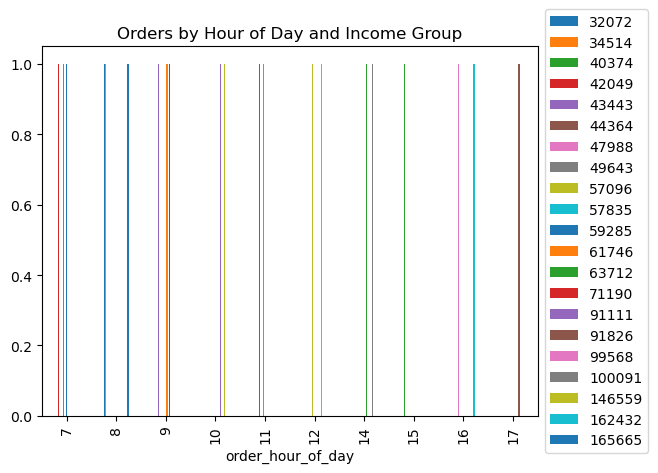

In [110]:
# Create a bar chart between Age Group with orders_day_of_week

income_group_order_hour_day_viz = income_group_order_hour_day.plot.bar()
plt.title('Orders by Hour of Day and Income Group')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

In [111]:
# Export
path = r'C:\Users\kanch\Documents\10-08-2023 Instacart Basket Analysis\04 Analysis\Visualizations'

income_group_order_hour_day_viz.figure.savefig(os.path.join(path, 'income_group_order_hour_day_viz.png'),bbox_inches='tight')

# d. Number of dependents

In [112]:
# Check family_status_flag with orders_day_of_week

family_status_flag_order_days_week = pd.crosstab(df_orders_products_merged['orders_day_of_week'],df_ords_prods_all_updated['marital_status'],dropna=False)

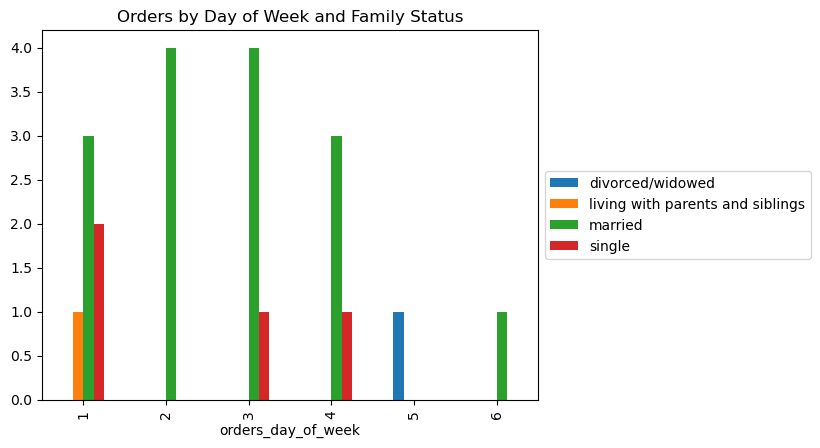

In [113]:
# Create a bar chart between family_status_flag with orders_day_of_week

family_status_flag_order_days_week_viz = family_status_flag_order_days_week.plot.bar()
plt.title('Orders by Day of Week and Family Status')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

In [114]:
# Export
path = r'C:\Users\kanch\Documents\10-08-2023 Instacart Basket Analysis\04 Analysis\Visualizations'
family_status_flag_order_days_week_viz.figure.savefig(os.path.join(path, 'family_status_flag_order_days_week_viz.png'),bbox_inches='tight')

In [115]:
# Check family_status_flag with orders_hour_of_day

family_status_flag_order_hour_day = pd.crosstab(df_orders_products_merged['order_hour_of_day'],df_ords_prods_all_updated['marital_status'],dropna=False)

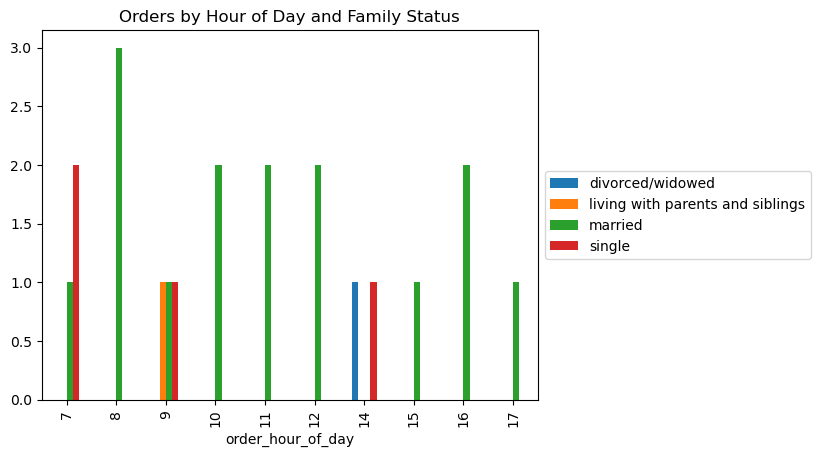

In [116]:
# Create a bar chart between family_status_flag with orders_day_of_week

family_status_flag_order_hour_day_viz = family_status_flag_order_hour_day.plot.bar()
plt.title('Orders by Hour of Day and Family Status')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

In [117]:
# Export
path = r'C:\Users\kanch\Documents\10-08-2023 Instacart Basket Analysis\04 Analysis\Visualizations'
family_status_flag_order_hour_day_viz.figure.savefig(os.path.join(path, 'family_status_flag_order_hour_day_viz.png'),bbox_inches='tight')

# 6. Create an appropriate visualization to show the distribution of profiles.

# a. Age

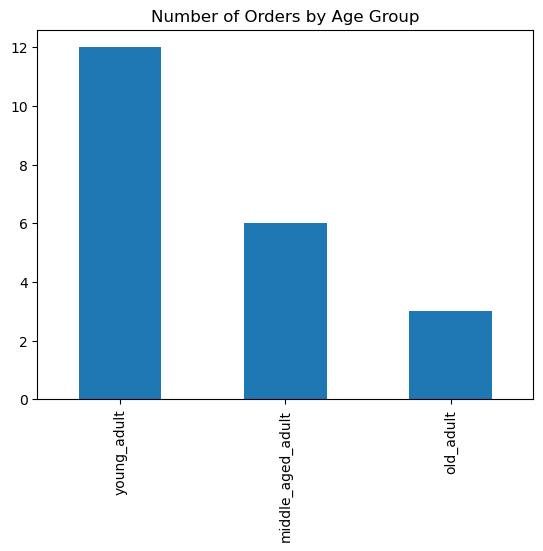

In [118]:
# Create a bar chart

age_bar_chart = df_ords_prods_all_updated['age_group'].value_counts().plot.bar()
plt.title('Number of Orders by Age Group')
plt.show()

Young age customers, under 35 make up the largest share of orders
Followed by middle aged customers betweem 35 & 60 older. With old aged customer, 60 and older
having the least!


In [119]:
# Export
path = r'C:\Users\kanch\Documents\10-08-2023 Instacart Basket Analysis\04 Analysis\Visualizations'
age_bar_chart.figure.savefig(os.path.join(path, 'age_bar_chart.png'),bbox_inches='tight')

# b. Income

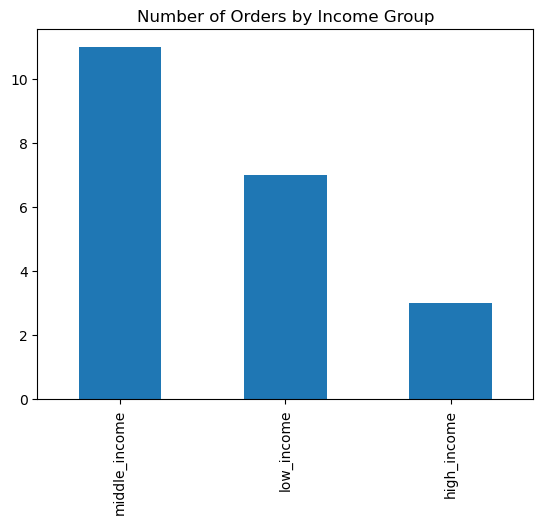

In [120]:
# Create a bar chart

income_bar_chart = df_ords_prods_all_updated['income_group'].value_counts().plot.bar()
plt.title('Number of Orders by Income Group')
plt.show()


Most of the orders are placed from middle_income users while only few are from low income users.



In [121]:
# Export
path = r'C:\Users\kanch\Documents\10-08-2023 Instacart Basket Analysis\04 Analysis\Visualizations'
income_bar_chart.figure.savefig(os.path.join(path, 'income_bar_chart.png'),bbox_inches='tight')

# c. Department

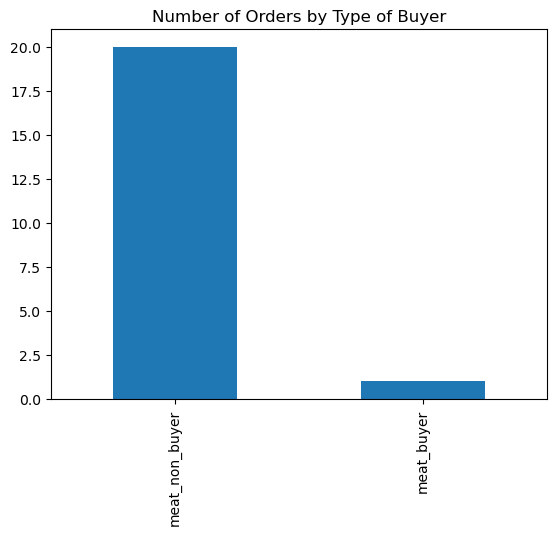

In [122]:
# Create a bar chart

meat_bar_chart = df_ords_prods_all_updated['customer'].value_counts().plot.bar()
plt.title('Number of Orders by Type of Buyer')
plt.show()

Low-income customers buy less meat and seafood products.


# d. Number of Dependents

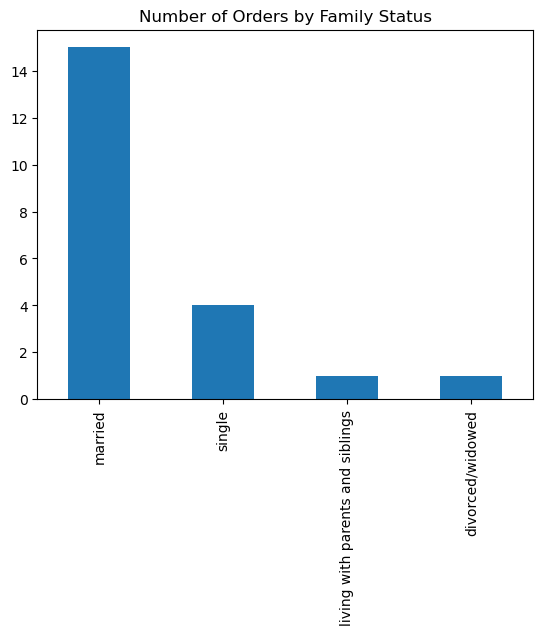

In [123]:
family_status_bar_chart = df_ords_prods_all_updated['marital_status'].value_counts().plot.bar()
plt.title('Number of Orders by Family Status')
plt.show()

Almost half of the orders have been placed by Married customers

In [124]:
# Export
path = r'C:\Users\kanch\Documents\10-08-2023 Instacart Basket Analysis\04 Analysis\Visualizations'
family_status_bar_chart.figure.savefig(os.path.join(path,'family_status_bar_chart.png'),bbox_inches='tight')

# e. Region

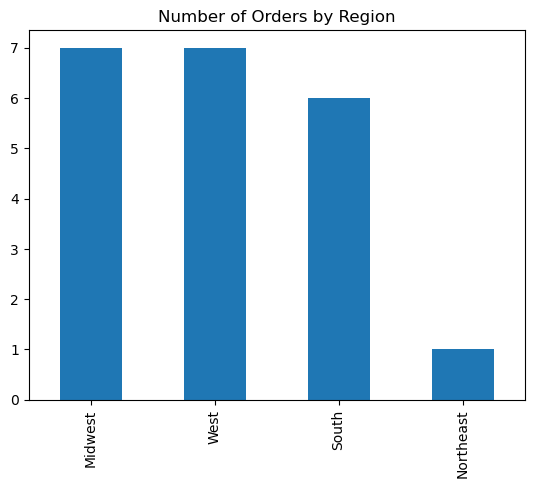

In [125]:
# Create a bar chart

region_bar_chart = df_ords_prods_all_updated['Region'].value_counts().plot.bar()
plt.title('Number of Orders by Region')
plt.show()

Event though Instacart customers are distributed relatively among the four regions, the largest proportion of customers is located in the Midwest


In [126]:
# Export
path = r'C:\Users\kanch\Documents\10-08-2023 Instacart Basket Analysis\04 Analysis\Visualizations'
region_bar_chart.figure.savefig(os.path.join(path, 'region_bar_chart.png'),bbox_inches='tight')

# 7. Aggregate the max, mean, and min variables on a customer-profile level for usage frequency and expenditure.

In [127]:
# Aggregate the max, mean, and min variables on a customer-profile level for usage frequency and expenditure.

crosstab = df_orders_products_merged.groupby('user_id').agg({'order_id':['count'],'days_since_prior_order':['min', 'mean', 'max'], 'prices':['min', 'mean', 'max']})

In [128]:
crosstab

order_id days_since_prior_order                  prices            \
           count                    min       mean   max    min      mean   
user_id                                                                     
1             59                    0.0  18.542373  30.0    1.0  6.367797   
2            195                    0.0  14.902564  30.0    1.3  7.515897   
3             88                    0.0  10.181818  21.0    1.3  8.197727   
4             18                    0.0  11.944444  21.0    1.4  8.205556   
5             37                    0.0  10.189189  19.0    3.2  9.189189   
...          ...                    ...        ...   ...    ...       ...   
206205        32                    0.0   9.687500  30.0    1.4  8.909375   
206206       285                    0.0   3.985965  15.0    1.1  7.646667   
206207       223                    0.0  13.278027  30.0    1.2  7.313453   
206208       677                    0.0   7.310192  20.0    1.1  8.366617   
206209       129                    0.0  18.232558  30.0    1.1  7.058915   

               
          max  
user_id        
1        14.0  
2        14.8  
3        14.4  
4        14.6  
5        14.8  
...       ...  
206205   23.8  
206206   14.8  
206207   24.7  
206208   21.6  
206209   18.8  

[206209 rows x 7 columns]

In [129]:
df_ords_prods_all_updated.head()

,user_id,gender,state,age,date_joined,number_of_dependants,marital_status,income,Region,max_order,customer_activity,age_group,income_group,department_id,department,family_status_flag,customer,customer_snacks
0,26711,Female,Missouri,48,1/1/2017,3,married,165665,Midwest,10,High_activity_customer,middle_aged_adult,high_income,1.0,frozen,Married WITH Dependants,meat_non_buyer,snack_non_buyer
1,33890,Female,New Mexico,36,1/1/2017,0,single,59285,West,10,High_activity_customer,young_adult,middle_income,2.0,other,Single with NO Dependants,meat_non_buyer,snack_non_buyer
2,65803,Male,Idaho,35,1/1/2017,2,married,99568,West,10,High_activity_customer,young_adult,middle_income,3.0,bakery,Married WITH Dependants,meat_non_buyer,snack_non_buyer
3,125935,Female,Iowa,40,1/1/2017,0,single,42049,Midwest,10,High_activity_customer,middle_aged_adult,low_income,4.0,produce,Single with NO Dependants,meat_non_buyer,snack_non_buyer
4,130797,Female,Maryland,26,1/1/2017,1,married,40374,South,10,High_activity_customer,young_adult,low_income,5.0,alcohol,Married with NO Dependants,meat_non_buyer,snack_non_buyer


In [130]:
df_orders_products_merged.head()

,Unnamed: 0,order_id,user_id,eval_set,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,_merge,product_name,aisle_id,department_id,prices,busiest_day,busiest_days,busiest_period_of_day,average_price,spending_flag
0,0,2539329,1,prior,1,2,8,0.0,196,1,0,both,Soda,77,7,9.0,Regularly busy,Regularly busy,Average orders,6.37,Low spender
1,1,2398795,1,prior,2,3,7,15.0,196,1,1,both,Soda,77,7,9.0,Regularly busy,Least busy days,Average orders,6.37,Low spender
2,2,473747,1,prior,3,3,12,21.0,196,1,1,both,Soda,77,7,9.0,Regularly busy,Least busy days,Most orders,6.37,Low spender
3,3,2254736,1,prior,4,4,7,29.0,196,1,1,both,Soda,77,7,9.0,Least busy,Least busy days,Average orders,6.37,Low spender
4,4,431534,1,prior,5,4,15,28.0,196,1,1,both,Soda,77,7,9.0,Least busy,Least busy days,Most orders,6.37,Low spender


# 8. Compare your customer profiles with regions and departments. Can you identify a link between them? Customers may demonstrate different behaviors across regions, which could make this information important.
8.1 Loyalty Flag
a. Age - compared with loyalty_flag

Aggregrating Data With Transform()


In [131]:
df_orders_products_merged['max_order'] = df_orders_products_merged.groupby('user_id')['order_number'].transform(np.max)

In [132]:
df_orders_products_merged.head(25)

,Unnamed: 0,order_id,user_id,eval_set,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,_merge,product_name,aisle_id,department_id,prices,busiest_day,busiest_days,busiest_period_of_day,average_price,spending_flag,max_order
0,0,2539329,1,prior,1,2,8,0.0,196,1,0,both,Soda,77,7,9.0,Regularly busy,Regularly busy,Average orders,6.37,Low spender,10
1,1,2398795,1,prior,2,3,7,15.0,196,1,1,both,Soda,77,7,9.0,Regularly busy,Least busy days,Average orders,6.37,Low spender,10
2,2,473747,1,prior,3,3,12,21.0,196,1,1,both,Soda,77,7,9.0,Regularly busy,Least busy days,Most orders,6.37,Low spender,10
3,3,2254736,1,prior,4,4,7,29.0,196,1,1,both,Soda,77,7,9.0,Least busy,Least busy days,Average orders,6.37,Low spender,10
4,4,431534,1,prior,5,4,15,28.0,196,1,1,both,Soda,77,7,9.0,Least busy,Least busy days,Most orders,6.37,Low spender,10
5,5,3367565,1,prior,6,2,7,19.0,196,1,1,both,Soda,77,7,9.0,Regularly busy,Regularly busy,Average orders,6.37,Low spender,10
6,6,550135,1,prior,7,1,9,20.0,196,1,1,both,Soda,77,7,9.0,Regularly busy,Busiest days,Most orders,6.37,Low spender,10
7,7,3108588,1,prior,8,1,14,14.0,196,2,1,both,Soda,77,7,9.0,Regularly busy,Busiest days,Most orders,6.37,Low spender,10
8,8,2295261,1,prior,9,1,16,0.0,196,4,1,both,Soda,77,7,9.0,Regularly busy,Busiest days,Most orders,6.37,Low spender,10
9,9,2550362,1,prior,10,4,8,30.0,196,1,1,both,Soda,77,7,9.0,Least busy,Least busy days,Average orders,6.37,Low spender,10


# Deriving Columns with Loc()

In [133]:
df_orders_products_merged.loc[df_orders_products_merged['max_order'] > 40, 'loyalty_flag'] = 'Loyal customer'

In [134]:
df_orders_products_merged.loc[(df_orders_products_merged['max_order'] <= 40) & (df_orders_products_merged['max_order'] > 10), 'loyalty_flag'] = 'Regular customer'

In [135]:
df_orders_products_merged.loc[df_orders_products_merged['max_order'] <= 10, 'loyalty_flag'] = 'New customer'

In [136]:
df_orders_products_merged['loyalty_flag'].value_counts(dropna = False)

Regular customer    15891077
Loyal customer      10293737
New customer         6249398
Name: loyalty_flag, dtype: int64

In [137]:
df_orders_products_merged.head()

,Unnamed: 0,order_id,user_id,eval_set,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,_merge,product_name,aisle_id,department_id,prices,busiest_day,busiest_days,busiest_period_of_day,average_price,spending_flag,max_order,loyalty_flag
0,0,2539329,1,prior,1,2,8,0.0,196,1,0,both,Soda,77,7,9.0,Regularly busy,Regularly busy,Average orders,6.37,Low spender,10,New customer
1,1,2398795,1,prior,2,3,7,15.0,196,1,1,both,Soda,77,7,9.0,Regularly busy,Least busy days,Average orders,6.37,Low spender,10,New customer
2,2,473747,1,prior,3,3,12,21.0,196,1,1,both,Soda,77,7,9.0,Regularly busy,Least busy days,Most orders,6.37,Low spender,10,New customer
3,3,2254736,1,prior,4,4,7,29.0,196,1,1,both,Soda,77,7,9.0,Least busy,Least busy days,Average orders,6.37,Low spender,10,New customer
4,4,431534,1,prior,5,4,15,28.0,196,1,1,both,Soda,77,7,9.0,Least busy,Least busy days,Most orders,6.37,Low spender,10,New customer


In [138]:
df_orders_products_merged[['user_id', 'max_order', 'loyalty_flag']].sample(30)

,user_id,max_order,loyalty_flag
32255846,132234,58,Loyal customer
31717817,168367,7,New customer
6405334,81516,15,Regular customer
16548110,161747,34,Regular customer
2159412,152429,41,Loyal customer
950994,23713,27,Regular customer
12450589,68992,18,Regular customer
26620987,36725,86,Loyal customer
30341108,48253,48,Loyal customer
10739154,141212,48,Loyal customer


In [139]:
# Check customer profile with Region

age_loyalty = pd.crosstab(df_orders_products_merged['loyalty_flag'],df_ords_prods_all_updated['age_group'],dropna=False)

In [140]:
age_loyalty = age_loyalty.sort_values(by=['young_adult'], ascending=True)

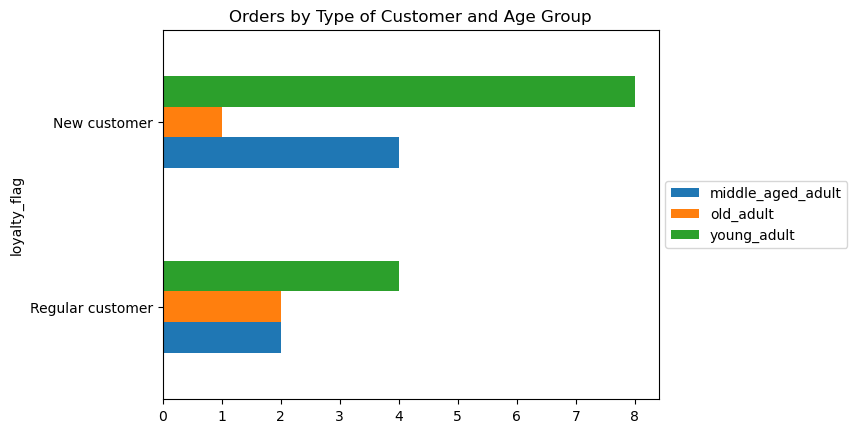

In [141]:
age_loyalty = age_loyalty.plot.barh()
plt.title('Orders by Type of Customer and Age Group')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

The age distribution across the different types of customers is not even

In [142]:
# Export
path = r'C:\Users\kanch\Documents\10-08-2023 Instacart Basket Analysis\04 Analysis\Visualizations'
age_loyalty.figure.savefig(os.path.join(path, 'age_loyalty_viz.png'),bbox_inches='tight')

# b. Income - compared with loyalty_flag

In [143]:
# Check customer profile with Region

income_loyalty = pd.crosstab(df_orders_products_merged['loyalty_flag'],df_ords_prods_all_updated['income_group'],dropna=False)

In [144]:
income_loyalty = income_loyalty.sort_values(by=['high_income'], ascending=True)

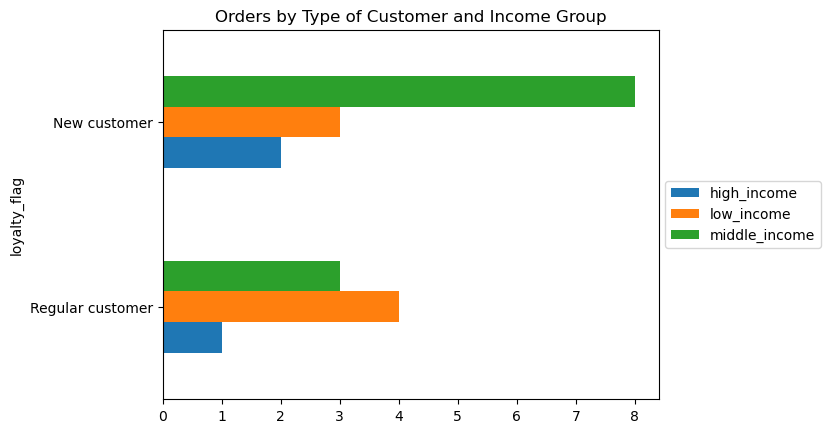

In [145]:
income_loyalty_viz = income_loyalty.plot.barh()
plt.title('Orders by Type of Customer and Income Group')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

The purchasing power across the different types of customers is not similar.


In [146]:
# Export
path = r'C:\Users\kanch\Documents\10-08-2023 Instacart Basket Analysis\04 Analysis\Visualizations'
income_loyalty_viz.figure.savefig(os.path.join(path,'income_loyalty_viz.png'),bbox_inches='tight')

# d. Number of Dependents - compared with loyalty_flag

In [147]:
# Check customer profile with Region

family_status_flag_loyalty = pd.crosstab(df_orders_products_merged['loyalty_flag'],df_ords_prods_all_updated['family_status_flag'],dropna=False)

In [148]:
family_status_flag_loyalty = family_status_flag_loyalty.sort_values(by=['Single WITH Dependants'], ascending=True)

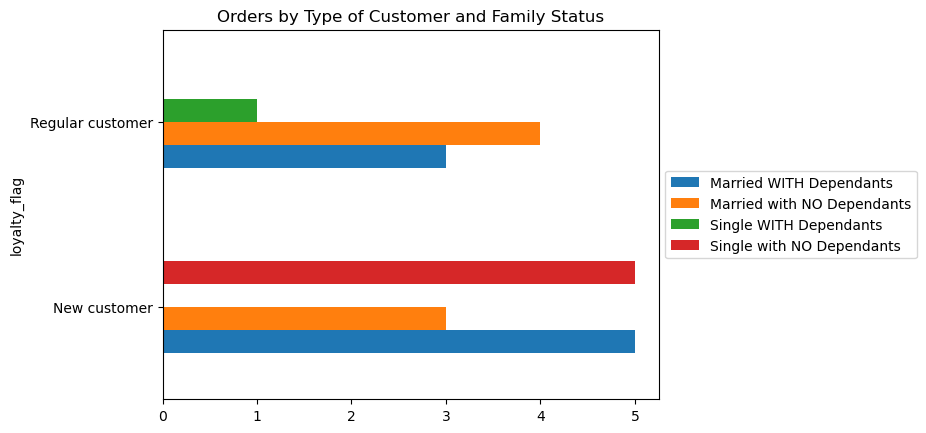

In [149]:
family_status_flag_loyalty = family_status_flag_loyalty.plot.barh()
plt.title('Orders by Type of Customer and Family Status')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

In [150]:
# Export
path = r'C:\Users\kanch\Documents\10-08-2023 Instacart Basket Analysis\04 Analysis\Visualizations'
family_status_flag_loyalty.figure.savefig(os.path.join(path, 'family_status_flag_loyalty.png'),bbox_inches='tight')

# e. Regions - compared with loyalty_flag

In [151]:
# Check customer profile with Region

region_flag_loyalty = pd.crosstab(df_orders_products_merged['loyalty_flag'],df_ords_prods_all_updated['Region'],dropna=False)

In [152]:
region_flag_loyalty = region_flag_loyalty.sort_values(by=['South'], ascending=True)

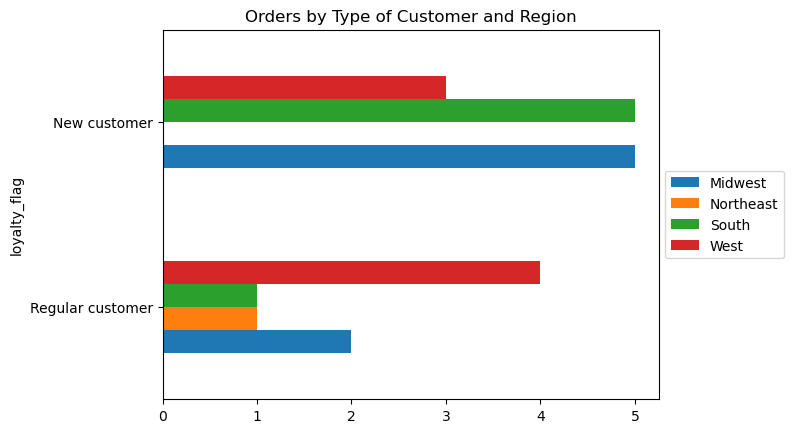

In [153]:
region_flag_loyalty = region_flag_loyalty.plot.barh()
plt.title('Orders by Type of Customer and Region')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

Regular, New Customers have a different distribution across the different regions.


In [154]:
# Export
path = r'C:\Users\kanch\Documents\10-08-2023 Instacart Basket Analysis\04 Analysis\Visualizations'
region_flag_loyalty.figure.savefig(os.path.join(path, 'region_flag_loyalty.png'),bbox_inches='tight')

# e. Regions - compared with departments

In [155]:
# Check customer profile with Region

region_departments = pd.crosstab(df_ords_prods_all_updated['department'],df_ords_prods_all_updated['Region'],dropna=False)

In [156]:
region_departments = region_departments.sort_values(by=['South'], ascending=True)

In [158]:
# Export
path =r'C:\Users\kanch\Documents\10-08-2023 Instacart Basket Analysis\04 Analysis\Visualizations'
region_departments_png.figure.savefig(os.path.join(path,'region_departments_png.png'),bbox_inches='tight')

# 8.2 Meat Seafood Customer
a. Age - compared with Meat Seafood Buyer

In [159]:
# Check customer profile with Region

age_customer = pd.crosstab(df_ords_prods_all_updated['age_group'],df_ords_prods_all_updated['customer'],dropna=False)

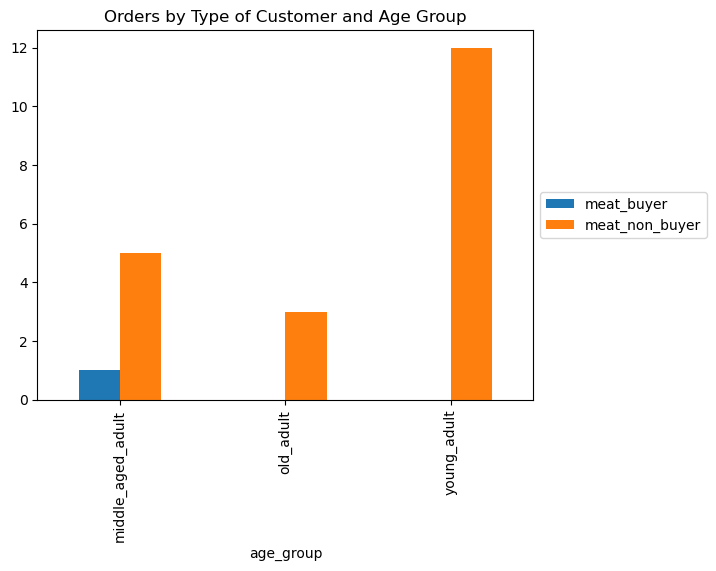

In [160]:
age_customer = age_customer.plot.bar()
plt.title('Orders by Type of Customer and Age Group')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

In [161]:
# Export
path = r'C:\Users\kanch\Documents\10-08-2023 Instacart Basket Analysis\04 Analysis\Visualizations'
age_customer.figure.savefig(os.path.join(path,'age_customer.png'),bbox_inches='tight')

# b. Income - compared with Meat Buyer

In [162]:
# Check customer profile with Region

income_customer = pd.crosstab(df_ords_prods_all_updated['income_group'],df_ords_prods_all_updated['customer'],dropna=False)

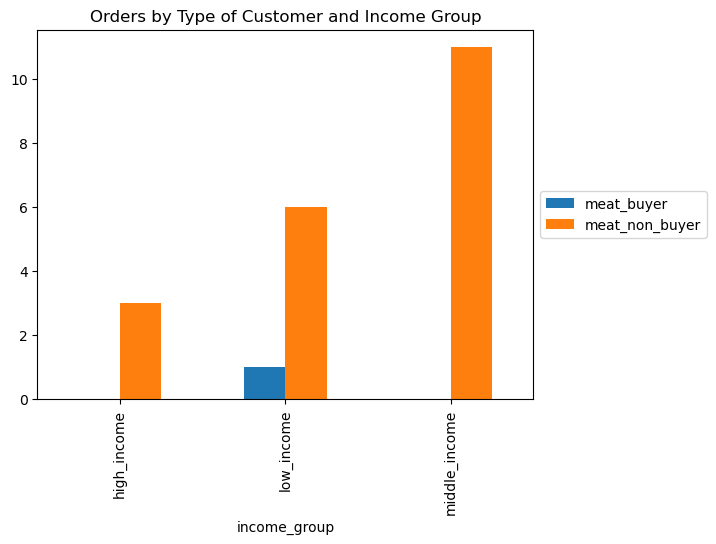

In [163]:
income_customer_viz = income_customer.plot.bar()
plt.title('Orders by Type of Customer and Income Group')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

Low-income customers buy less meat and seafood products.


In [164]:
# Export
path = r'C:\Users\kanch\Documents\10-08-2023 Instacart Basket Analysis\04 Analysis\Visualizations'
income_customer_viz.figure.savefig(os.path.join(path,'income_customer_viz.png'),bbox_inches='tight')

# d. Number of Dependents - compared with Meat Buyer

In [165]:
# Check customer profile with Region

family_status_flag_customer = pd.crosstab(df_ords_prods_all_updated['family_status_flag'],df_ords_prods_all_updated['customer'],dropna=False)

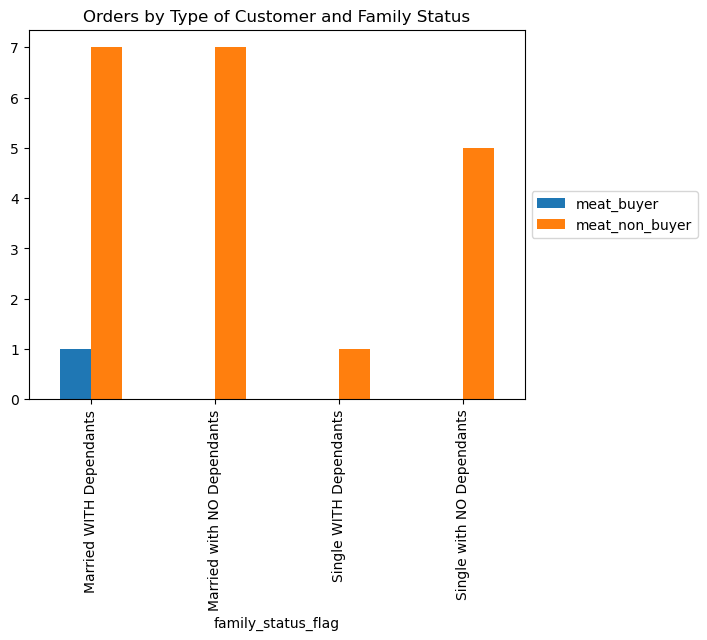

In [166]:
family_status_flag_customer = family_status_flag_customer.plot.bar()
plt.title('Orders by Type of Customer and Family Status')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

In [167]:
# Export
path = r'C:\Users\kanch\Documents\10-08-2023 Instacart Basket Analysis\04 Analysis\Visualizations'
family_status_flag_customer.figure.savefig(os.path.join(path,'family_status_flag_customer.png'),bbox_inches='tight')

# e. Regions - compared with Meat Buyer

In [168]:
# Check customer profile with Region

region_flag_customer = pd.crosstab(df_ords_prods_all_updated['Region'],df_ords_prods_all_updated['customer'],dropna=False)

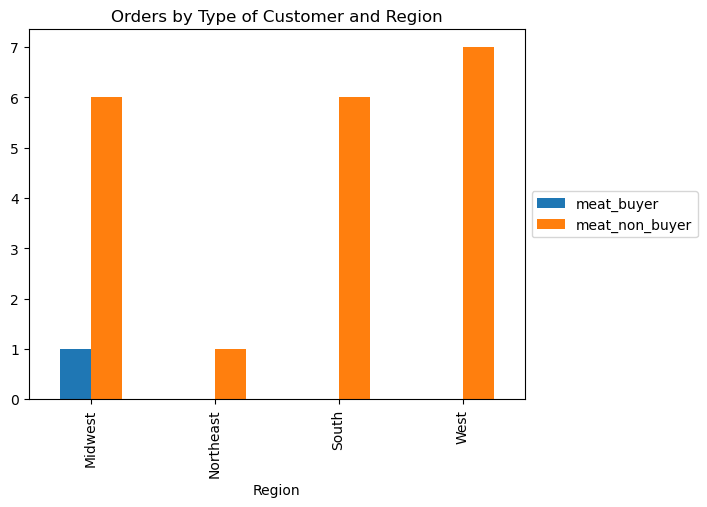

In [169]:
region_flag_customer = region_flag_customer.plot.bar()
plt.title('Orders by Type of Customer and Region')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

In [170]:
# Export
path =r'C:\Users\kanch\Documents\10-08-2023 Instacart Basket Analysis\04 Analysis\Visualizations'
region_flag_customer.figure.savefig(os.path.join(path, 'region_flag_customer.png'),bbox_inches='tight')

# 8.3 Snack Customer

a. Age - compared with Snack Buyer

In [171]:
# Check customer profile with Region

age_snacks = pd.crosstab(df_ords_prods_all_updated['age_group'],df_ords_prods_all_updated['customer_snacks'],dropna=False)

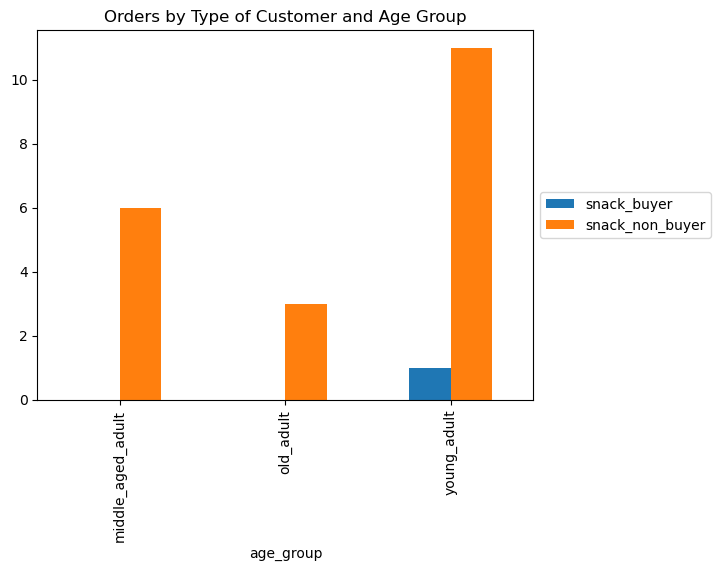

In [172]:
age_snacks = age_snacks.plot.bar()
plt.title('Orders by Type of Customer and Age Group')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

In [173]:
# Export
path = r'C:\Users\kanch\Documents\10-08-2023 Instacart Basket Analysis\04 Analysis\Visualizations'
age_snacks.figure.savefig(os.path.join(path,'age_snacks.png'),bbox_inches='tight')

# b. Income - compared with Snack Buyer

In [174]:
# Check customer profile with Region

income_snacks = pd.crosstab(df_ords_prods_all_updated['income_group'],df_ords_prods_all_updated['customer_snacks'],dropna=False)

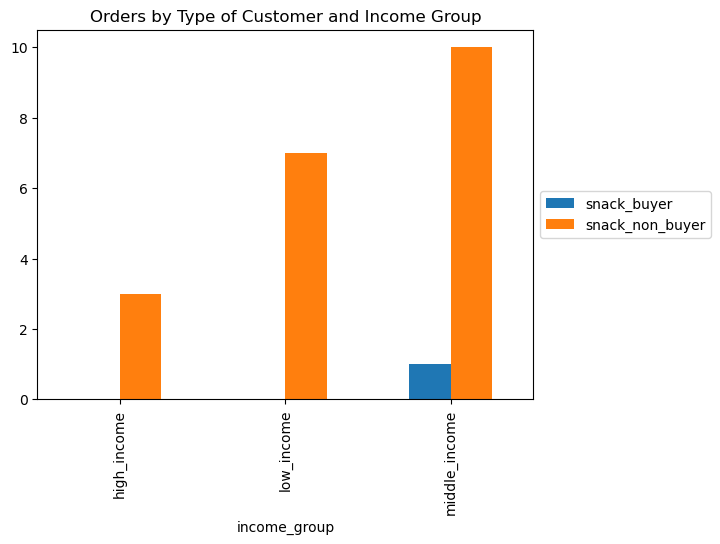

In [175]:
income_snacks = income_snacks.plot.bar()
plt.title('Orders by Type of Customer and Income Group')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

In [176]:
# Export
path = r'C:\Users\kanch\Documents\10-08-2023 Instacart Basket Analysis\04 Analysis\Visualizations'
income_snacks.figure.savefig(os.path.join(path,'income_snacks.png'),bbox_inches='tight')

# d. Number of Dependents - compared with Snack Buyer

In [177]:
# Check customer profile with Region

family_status_flag_snacks = pd.crosstab(df_ords_prods_all_updated['family_status_flag'],df_ords_prods_all_updated['customer_snacks'],dropna=False)

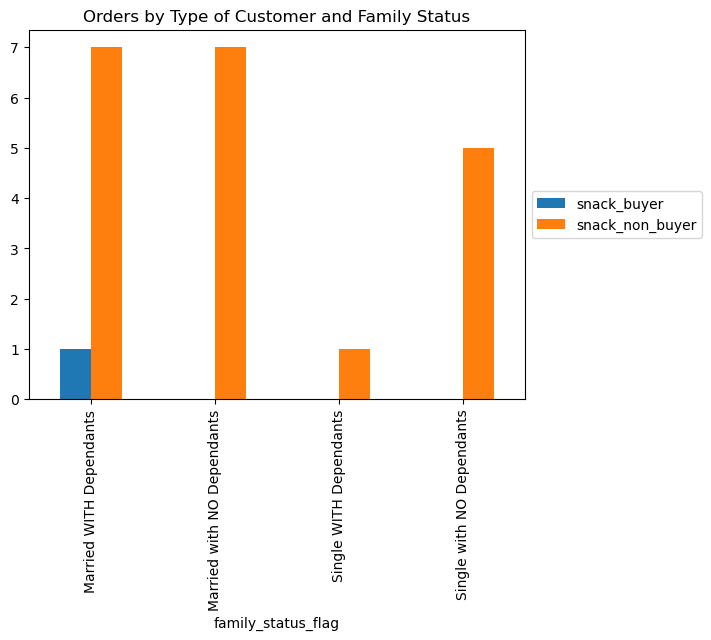

In [178]:
family_status_flag_snacks = family_status_flag_snacks.plot.bar()
plt.title('Orders by Type of Customer and Family Status')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

In [179]:
# Export
path = r'C:\Users\kanch\Documents\10-08-2023 Instacart Basket Analysis\04 Analysis\Visualizations'
family_status_flag_snacks.figure.savefig(os.path.join(path, 'family_status_flag_snacks.png'),bbox_inches='tight')

# e. Regions - compared with Snack Buyer

In [180]:
# Check customer profile with Region

region_flag_snacks = pd.crosstab(df_ords_prods_all_updated['Region'],df_ords_prods_all_updated['customer_snacks'],dropna=False)

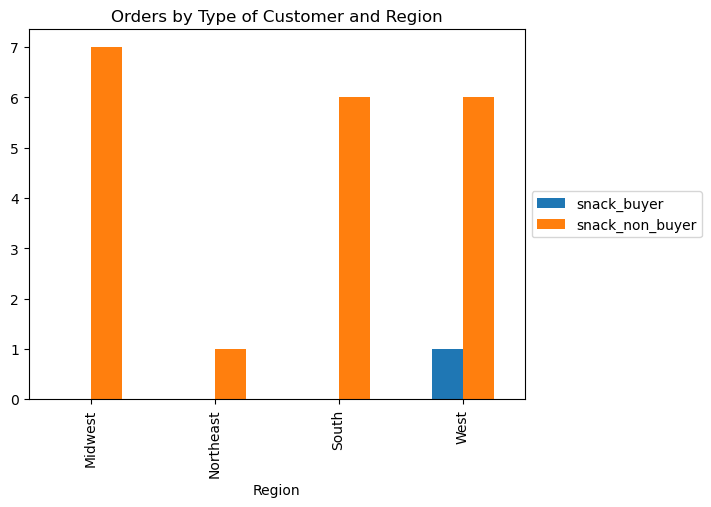

In [181]:
region_flag_snacks = region_flag_snacks.plot.bar()
plt.title('Orders by Type of Customer and Region')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

# Most customers have not purchased snacks. Ordering habits between snack buyers and non buyers are inconsistent with the general trends.


In [182]:
# Export
path = r'C:\Users\kanch\Documents\10-08-2023 Instacart Basket Analysis\04 Analysis\Visualizations'
region_flag_snacks.figure.savefig(os.path.join(path,'region_flag_snacks.png'),bbox_inches='tight')

# Export

In [184]:
# Export to pickle file
path = r'C:\Users\kanch\OneDrive\Desktop\Career Foundry\Achievement 4. Python 8.8.2023\Moved_Files\02 Data\Prepared Data'
df_ords_prods_all_updated.to_pickle(os.path.join(path,'df_ords_prods_all_updated final.pkl'))

In [185]:
# Export to pickle file
path = r'C:\Users\kanch\OneDrive\Desktop\Career Foundry\Achievement 4. Python 8.8.2023\Moved_Files\02 Data\Prepared Data'
df_orders_products_merged.to_pickle(os.path.join(path,'df_orders_products_merged final.pkl'))